**1. Implémentation manuellement du réseau présenté**

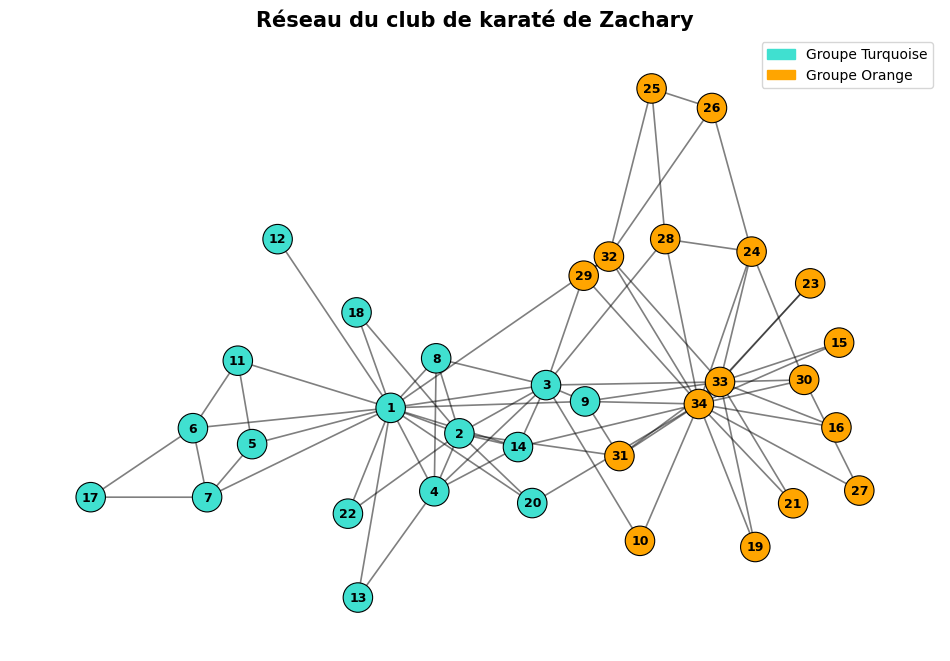

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Définir toutes les arêtes (edges) ---
edges = [
 (1,12),(1,18),(1,6),(1,7),(1,11),(1,5),(1,13),(1,8),(1,4),(1,3),(1,14),
 (1,2),(1,32),(1,20),(1,22),(1,9),
 (2,4),(2,8),(2,14),(2,18),(2,20),(2,22),(2,3),(2,31),
 (3,4),(3,8),(3,9),(3,10),(3,14),(3,28),(3,29),(3,33),
 (4,8),(4,13),(4,14),
 (5,7),(5,11),
 (6,7),(6,11),(6,17),
 (7,17),
 (9,31),(9,33),(9,34),
 (10,34),
 (14,34),
 (15,33),(15,34),
 (16,34),(16,33),
 (19,33),(19,34),
 (20,34),
 (21,33),(21,34),
 (23,33),(23,34),
 (24,26),(24,28),(24,30),(24,33),(24,34),
 (25,26),(25,28),(25,32),
 (26,32),
 (27,34),(27,30),
 (28,34),
 (29,32),(29,34),
 (30,33),(30,34),
 (31,33),(31,34),
 (32,33),(32,34),
 (33,34)
]

# --- 2. Créer le graphe ---
G = nx.Graph()
G.add_edges_from(edges)

# --- 3. Définir les groupes et couleurs ---
turquoise_nodes = [1,2,3,4,5,6,7,8,9,11,12,13,14,17,18,20,22]
orange_nodes = [10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34]

def get_color(node):
    if node in turquoise_nodes:
        return "#40E0D0"  # turquoise
    elif node in orange_nodes:
        return "orange"
    else:
        return "lightgray"

# Créer la liste des couleurs de chaque nœud
colors = [get_color(node) for node in G.nodes()]

# --- 4. Générer les positions (layout) ---
pos = nx.spring_layout(G, seed=5)  # tu peux changer le seed pour ajuster le rendu

# --- 5. Tracer le graphe ---
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=450, edgecolors="black", linewidths=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1.2)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# --- 6. Légende ---
import matplotlib.patches as mpatches
turquoise_patch = mpatches.Patch(color="#40E0D0", label="Groupe Turquoise")
orange_patch = mpatches.Patch(color="orange", label="Groupe Orange")
plt.legend(handles=[turquoise_patch, orange_patch], loc="best")

plt.title("Réseau du club de karaté de Zachary", fontsize=15, fontweight='bold')
plt.axis("off")
plt.show()


**La création de la matrice d'adjacence**

In [45]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

# nombre de nœuds
n = 34

# création d'une matrice n x n remplie de 0
A = np.zeros((n, n), dtype=int)

# remplissage de la matrice selon les arêtes (u, v)
for u, v in edges:
    A[u-1, v-1] = 1   # lien de u vers v
    A[v-1, u-1] = 1   # lien de v vers u (graphe non orienté)

# création d’un DataFrame pour un affichage plus clair
df = pd.DataFrame(A, index=range(1, n+1), columns=range(1, n+1))

# affichage de la matrice avec défilement
html = df.to_html()
display(HTML(f"""
<div style="height:950px; width:1060px; overflow:auto; border:2px solid #888; padding:20px;">
{html}
</div>
"""))


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Calcul et interprétation des mesures**

Mesures globales


Mesure,Valeur
Ordre du graphe,34
Taille du graphe,78
Nb sous-graphes (3 nœuds),5984
Nb motifs fréquents,0
Seuil min_freq,0.200000
Nb total de cliques,36
Plus grande clique (taille),"5 : 1, 2, 3, 4, 8"
K-core maximal,4
Clustering moyen,0.571000



Distribution des degrés


Sommet,Degré
1,16
2,9
3,10
4,6
5,3
6,4
7,4
8,4
9,5
10,2



Centralités des sommets


Sommet,Degré,Proximité,Intermédiarité,Authority,Hub
1,0.484848,0.569000,0.875300,0.355492,0.355491
2,0.272727,0.485300,0.107900,0.265960,0.265960
3,0.303030,0.559300,0.287300,0.317193,0.317192
4,0.181818,0.464800,0.023800,0.211180,0.211180
5,0.090909,0.379300,0.001300,0.075969,0.075969
6,0.121212,0.383700,0.060000,0.079483,0.079483
7,0.121212,0.383700,0.060000,0.079483,0.079483
8,0.121212,0.440000,0.000000,0.170960,0.170960
9,0.151515,0.515600,0.111900,0.227404,0.227404
10,0.060606,0.434200,0.001700,0.102674,0.102674



Clustering par sommet


Sommet,Clustering
1,0.150000
2,0.333000
3,0.244000
4,0.667000
5,0.667000
6,0.500000
7,0.500000
8,1.000000
9,0.500000
10,0.000000


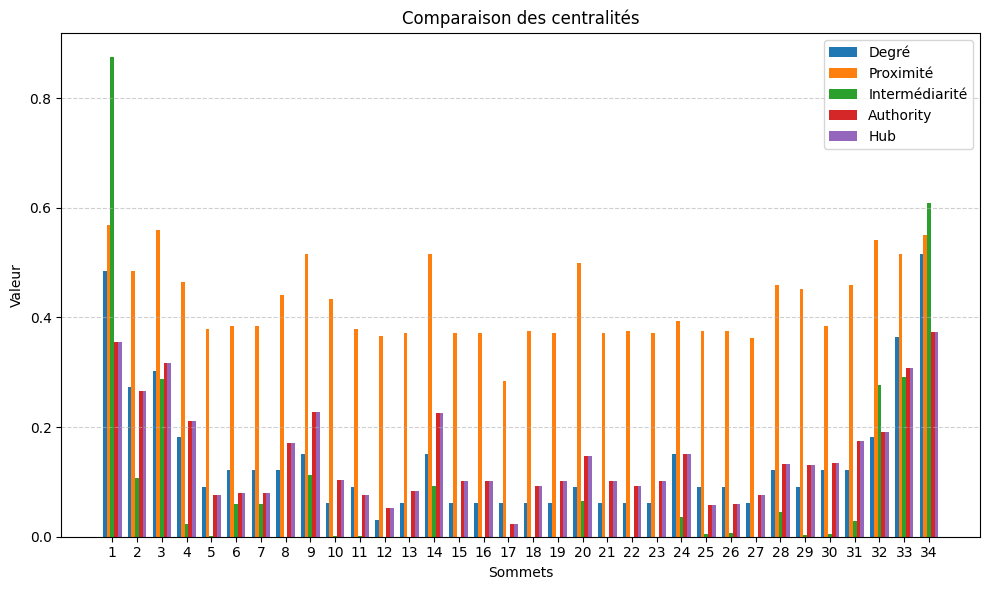


Résumé :

Le graphe a 34 sommets et 78 arêtes.
0 motifs trouvés sur 5984 sous-graphes.
La plus grande clique contient 5 sommets : 1, 2, 3, 4, 8.
Clustering moyen : 0.571.
K-core maximal : 4.

Sommets les plus centraux :
  Degré → 34
  Proximité → 1
  Intermédiarité → 1
  Authority → 34
  Hub → 34


In [46]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import deque

# Infos générales sur le graphe
ordre = G.number_of_nodes()      # nombre de sommets
taille = G.number_of_edges()     # nombre d’arêtes
nodes = list(G.nodes())          # liste des sommets
edges = list(G.edges())          # liste des arêtes

# Calcul du degré de chaque sommet
degree_dict = {node: 0 for node in nodes}
for u, v in edges:
    degree_dict[u] += 1
    degree_dict[v] += 1
degree_df = pd.DataFrame(sorted(degree_dict.items()), columns=["Sommet", "Degré"])

# Calcul du coefficient de clustering pour chaque sommet
clustering_dict = {}
details_clustering = []
for node in nodes:
    voisins = list(G.neighbors(node))     # on récupère les voisins du sommet
    k_v = len(voisins)                    # degré local
    if k_v < 2:
        clustering_dict[node] = 0.0
        details_clustering.append([node, voisins, k_v, 0, 0.0])
        continue
    e_v = 0
    for i in range(len(voisins)):
        for j in range(i + 1, len(voisins)):
            if G.has_edge(voisins[i], voisins[j]):   # on regarde si deux voisins sont liés
                e_v += 1
    cc_v = (2 * e_v) / (k_v * (k_v - 1))             # formule du clustering
    clustering_dict[node] = round(cc_v, 3)
    details_clustering.append([node, voisins, k_v, e_v, round(cc_v, 3)])

clustering_df = pd.DataFrame(sorted(clustering_dict.items()), columns=["Sommet", "Clustering"])
details_clustering_df = pd.DataFrame(details_clustering, columns=["Sommet", "Voisins", "k_v", "e_v", "CC(v)"])
coeff_moyen = round(np.mean(list(clustering_dict.values())), 3)

# Recherche des sous-graphes de 3 sommets (motifs)
sous_graphes = list(combinations(nodes, 3))
nb_total_sous_graphes = len(sous_graphes)
min_freq = 0.2
motifs_data = []
nb_motifs_frequents = 0

for trio in sous_graphes:
    sous_graphe = G.subgraph(trio)
    nb_arêtes = sous_graphe.number_of_edges()
    freq_M = round(1 / nb_total_sous_graphes, 3) if nb_arêtes > 0 else 0
    est_frequent = freq_M >= min_freq
    motifs_data.append([trio, nb_arêtes, freq_M, "Oui" if est_frequent else "Non"])
    if est_frequent:
        nb_motifs_frequents += 1

motifs_df = pd.DataFrame(motifs_data, columns=["Sous-graphe (3 nœuds)", "Nombre d'arêtes", "Fréquence", "Fréquent ?"])

# Recherche des cliques maximales
cliques = list(nx.find_cliques(G))
nb_cliques = len(cliques)
max_clique = sorted(max(cliques, key=len))
taille_max_clique = len(max_clique)
cliques_df = pd.DataFrame({
    "Clique": [', '.join(map(str, sorted(c))) for c in cliques],
    "Taille": [len(c) for c in cliques]
}).sort_values(by="Taille", ascending=False).reset_index(drop=True)

# Calcul du K-core de chaque sommet
core_numbers = nx.core_number(G)
core_df = pd.DataFrame(sorted(core_numbers.items()), columns=["Sommet", "K-core"])
k_core_max = max(core_numbers.values())

# Centralité de degré (mesure de connexion)
degree_centrality = {v: degree_dict[v] / (ordre - 1) for v in nodes}

# Centralité de proximité (mesure de distance moyenne)
def closeness_centrality_manual(G, node):
    distances = nx.single_source_shortest_path_length(G, node)
    total = sum(distances.values())
    if total > 0 and len(distances) > 1:
        return (len(distances) - 1) / total
    else:
        return 0.0

closeness_dict = {v: round(closeness_centrality_manual(G, v), 4) for v in nodes}

# Centralité d’intermédiarité (importance sur les chemins)
def shortest_paths_count(G, source):
    dist = {v: -1 for v in G.nodes()}
    sigma = {v: 0 for v in G.nodes()}
    pred = {v: [] for v in G.nodes()}
    dist[source] = 0
    sigma[source] = 1
    Q = deque([source])
    S = []
    while Q:
        v = Q.popleft()
        S.append(v)
        for w in G.neighbors(v):
            if dist[w] < 0:
                dist[w] = dist[v] + 1
                Q.append(w)
            if dist[w] == dist[v] + 1:
                sigma[w] += sigma[v]
                pred[w].append(v)
    return S, pred, sigma

def betweenness_centrality_manual(G):
    CB = {v: 0.0 for v in G.nodes()}
    for s in G.nodes():
        S, pred, sigma = shortest_paths_count(G, s)
        delta = {v: 0.0 for v in G.nodes()}
        while S:
            w = S.pop()
            for v in pred[w]:
                delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])
            if w != s:
                CB[w] += delta[w]
    norm = 1 / ((ordre - 1) * (ordre - 2) / 2)
    for v in CB:
        CB[v] *= norm
    return CB

betweenness_dict = {v: round(b, 4) for v, b in betweenness_centrality_manual(G).items()}

# Centralité HITS (scores d’autorité et de hub)
def hits_manual(G, max_iter=100, tol=1e-6):
    nodes = list(G.nodes())
    h = {v: 1.0 for v in nodes}
    a = {v: 0.0 for v in nodes}
    for _ in range(max_iter):
        for v in nodes:
            a[v] = sum(h[u] for u in G.neighbors(v))
        for v in nodes:
            h[v] = sum(a[u] for u in G.neighbors(v))
        norm_a = np.sqrt(sum(val ** 2 for val in a.values()))
        norm_h = np.sqrt(sum(val ** 2 for val in h.values()))
        for v in nodes:
            a[v] /= norm_a if norm_a != 0 else 1
            h[v] /= norm_h if norm_h != 0 else 1
        if all(abs(a[v] - h[v]) < tol for v in nodes):
            break
    return a, h

authority_dict, hub_dict = hits_manual(G)

# Tableau des centralités
centrality_df = pd.DataFrame({
    "Sommet": nodes,
    "Degré": [degree_centrality[v] for v in nodes],
    "Proximité": [closeness_dict[v] for v in nodes],
    "Intermédiarité": [betweenness_dict[v] for v in nodes],
    "Authority": [authority_dict[v] for v in nodes],
    "Hub": [hub_dict[v] for v in nodes],
}).sort_values(by="Sommet").reset_index(drop=True)

# Tableau global de synthèse
global_df = pd.DataFrame({
    "Mesure": [
        "Ordre du graphe",
        "Taille du graphe",
        "Nb sous-graphes (3 nœuds)",
        "Nb motifs fréquents",
        "Seuil min_freq",
        "Nb total de cliques",
        "Plus grande clique (taille)",
        "K-core maximal",
        "Clustering moyen"
    ],
    "Valeur": [
        ordre,
        taille,
        nb_total_sous_graphes,
        nb_motifs_frequents,
        min_freq,
        nb_cliques,
        f"{taille_max_clique} : " + ', '.join(map(str, max_clique)),
        k_core_max,
        coeff_moyen
    ]
})

# Fonction pour afficher les tableaux proprement
def style_clean(df, max_height="400px", max_width="700px"):
    return (df.style
            .set_table_attributes(
                f'style="display:inline-block;overflow:auto;max-height:{max_height};max-width:{max_width};border-collapse:collapse;"'
            )
            .set_properties(**{
                'border': '1px solid #aaa',
                'padding': '6px',
                'font-family': 'Arial, sans-serif',
                'font-size': '13px',
                'text-align': 'left'
            })
            .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])
            .hide(axis="index")
           )

# Affichage des résultats
print("Mesures globales")
display(style_clean(global_df))

print("\nDistribution des degrés")
display(style_clean(degree_df))

print("\nCentralités des sommets")
display(style_clean(centrality_df))

print("\nClustering par sommet")
display(style_clean(clustering_df))

# Graphique pour comparer les centralités
plt.figure(figsize=(10, 6))
x = np.arange(len(nodes))
width = 0.15
plt.bar(x - 2*width, centrality_df["Degré"], width=width, label="Degré")
plt.bar(x - width, centrality_df["Proximité"], width=width, label="Proximité")
plt.bar(x, centrality_df["Intermédiarité"], width=width, label="Intermédiarité")
plt.bar(x + width, centrality_df["Authority"], width=width, label="Authority")
plt.bar(x + 2*width, centrality_df["Hub"], width=width, label="Hub")

plt.xticks(x, centrality_df["Sommet"])
plt.xlabel("Sommets")
plt.ylabel("Valeur")
plt.title("Comparaison des centralités")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Petit résumé textuel à la fin
print("\nRésumé :\n")
print(f"Le graphe a {ordre} sommets et {taille} arêtes.")
print(f"{nb_motifs_frequents} motifs trouvés sur {nb_total_sous_graphes} sous-graphes.")
print(f"La plus grande clique contient {taille_max_clique} sommets : {', '.join(map(str, max_clique))}.")
print(f"Clustering moyen : {coeff_moyen}.")
print(f"K-core maximal : {k_core_max}.\n")
print("Sommets les plus centraux :")
print(f"  Degré → {max(degree_centrality, key=degree_centrality.get)}")
print(f"  Proximité → {max(closeness_dict, key=closeness_dict.get)}")
print(f"  Intermédiarité → {max(betweenness_dict, key=betweenness_dict.get)}")
print(f"  Authority → {max(authority_dict, key=authority_dict.get)}")
print(f"  Hub → {max(hub_dict, key=hub_dict.get)}")


**2. Identification des nœuds les plus centraux:**

**pour le réseaux complet :**


Classement général des nœuds selon les différentes centralités :


Sommet,Degré,Proximité,Intermédiarité,Authority,Hub
34,0.515152,0.550000,0.608100,0.373364,0.373363
1,0.484848,0.569000,0.875300,0.355492,0.355491
33,0.363636,0.515600,0.290500,0.308644,0.308644
3,0.303030,0.559300,0.287300,0.317193,0.317192
2,0.272727,0.485300,0.107900,0.265960,0.265960
4,0.181818,0.464800,0.023800,0.211180,0.211180
32,0.181818,0.541000,0.276600,0.191034,0.191034
24,0.151515,0.392900,0.035200,0.150119,0.150119
14,0.151515,0.515600,0.091700,0.226473,0.226473
9,0.151515,0.515600,0.111900,0.227404,0.227404



Top 3 des nœuds les plus centraux selon chaque mesure :

→ Par centralité de degré :


Nœud,Degré,Rang
34,0.515152,1
1,0.484848,2
33,0.363636,3



→ Par centralité de proximité :


Nœud,Proximité,Rang
1,0.569000,1
3,0.559300,2
34,0.550000,3



→ Par centralité d’intermédiarité :


Nœud,Intermédiarité,Rang
1,0.875300,1
34,0.608100,2
33,0.290500,3



→ Par score d’authority :


Nœud,Authority,Rang
34,0.373364,1
1,0.355492,2
3,0.317193,3



→ Par score de hub :


Nœud,Hub,Rang
34,0.373363,1
1,0.355491,2
3,0.317192,3


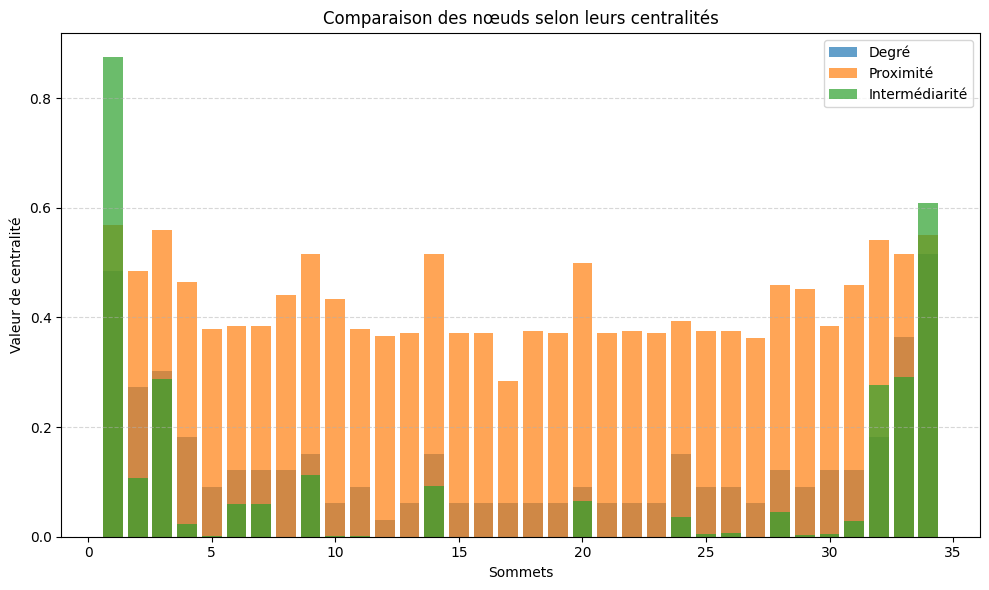

In [47]:
# Identification des nœuds les plus centraux à partir des centralités déjà calculées

# On rassemble les valeurs dans un tableau pour mieux comparer
centralites_df = pd.DataFrame({
    "Sommet": list(G.nodes()),
    "Degré": [degree_centrality[n] for n in G.nodes()],
    "Proximité": [closeness_dict[n] for n in G.nodes()],
    "Intermédiarité": [betweenness_dict[n] for n in G.nodes()],
    "Authority": [authority_dict[n] for n in G.nodes()],
    "Hub": [hub_dict[n] for n in G.nodes()]
}).sort_values(by="Degré", ascending=False).reset_index(drop=True)

# Affiche le classement général selon les centralités
print("\nClassement général des nœuds selon les différentes centralités :")
display(style_clean(centralites_df, max_height="700px"))

# Top 3 des nœuds les plus centraux selon chaque type de centralité
print("\nTop 3 des nœuds les plus centraux selon chaque mesure :")

# Par degré (popularité)
top_deg = centralites_df.nlargest(3, "Degré")[["Sommet", "Degré"]]
top_deg["Rang"] = range(1, 4)
print("\n→ Par centralité de degré :")
display(style_clean(top_deg.rename(columns={"Sommet": "Nœud"})))

# Par proximité (rapidité d'accès)
top_close = centralites_df.nlargest(3, "Proximité")[["Sommet", "Proximité"]]
top_close["Rang"] = range(1, 4)
print("\n→ Par centralité de proximité :")
display(style_clean(top_close.rename(columns={"Sommet": "Nœud"})))

# Par intermédiarité (rôle d’intermédiaire)
top_betw = centralites_df.nlargest(3, "Intermédiarité")[["Sommet", "Intermédiarité"]]
top_betw["Rang"] = range(1, 4)
print("\n→ Par centralité d’intermédiarité :")
display(style_clean(top_betw.rename(columns={"Sommet": "Nœud"})))

# Par authority (influence dans le réseau)
top_auth = centralites_df.nlargest(3, "Authority")[["Sommet", "Authority"]]
top_auth["Rang"] = range(1, 4)
print("\n→ Par score d’authority :")
display(style_clean(top_auth.rename(columns={"Sommet": "Nœud"})))

# Par hub (capacité à pointer vers des sommets importants)
top_hub = centralites_df.nlargest(3, "Hub")[["Sommet", "Hub"]]
top_hub["Rang"] = range(1, 4)
print("\n→ Par score de hub :")
display(style_clean(top_hub.rename(columns={"Sommet": "Nœud"})))

# Petit graphique de synthèse
plt.figure(figsize=(10, 6))
plt.bar(centralites_df["Sommet"], centralites_df["Degré"], label="Degré", alpha=0.7)
plt.bar(centralites_df["Sommet"], centralites_df["Proximité"], label="Proximité", alpha=0.7)
plt.bar(centralites_df["Sommet"], centralites_df["Intermédiarité"], label="Intermédiarité", alpha=0.7)
plt.title("Comparaison des nœuds selon leurs centralités")
plt.xlabel("Sommets")
plt.ylabel("Valeur de centralité")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Par groupe :**

In [51]:
print("\nANALYSE DES GROUPES\n")

# Définition des groupes
groupes = {
    "Turquoise": turquoise_nodes,
    "Orange": orange_nodes
}

leaders = {}  # Stocke le leader de chaque groupe

for nom_groupe, noeuds_groupe in groupes.items():
    # Filtrer les nœuds du groupe
    df_groupe = centralites_df[centralites_df['Sommet'].isin(noeuds_groupe)].copy()
    
    print(f"Groupe {nom_groupe}")
    
    # Top 3 par chaque centralité
    for centralite in ["Degré", "Proximité", "Intermédiarité", "Authority", "Hub"]:
        top3 = df_groupe.nlargest(3, centralite)[["Sommet", centralite]].reset_index(drop=True)
        top3["Rang"] = range(1, len(top3)+1)
        print(f"\nTop 3 par {centralite} :")
        display(style_clean(top3.rename(columns={"Sommet": "Nœud"}), max_height="300px"))
    
    # Identifier le leader par degré
    leader = int(df_groupe.nlargest(1, "Degré")["Sommet"].iloc[0])
    leaders[nom_groupe] = leader

print("\nPONTS ENTRE LES GROUPES")

bridges = []
for node in G.nodes():
    if node in turquoise_nodes:
        inter_conn = sum(1 for neighbor in G.neighbors(node) if neighbor in orange_nodes)
    elif node in orange_nodes:
        inter_conn = sum(1 for neighbor in G.neighbors(node) if neighbor in turquoise_nodes)
    else:
        inter_conn = 0
    if inter_conn > 0:
        bridges.append((node, inter_conn))

if bridges:
    bridges_df = pd.DataFrame(bridges, columns=['Nœud', 'Connexions inter-groupes'])
    bridges_df = bridges_df.sort_values('Connexions inter-groupes', ascending=False).reset_index(drop=True)
    print("\nNœuds jouant un rôle de pont (top 3) :")
    display(style_clean(bridges_df.head(3), max_height="200px"))
else:
    print("Aucune connexion entre les groupes")

print("\nSYNTHÈSE DES LEADERS")
for nom_groupe, leader in leaders.items():
    print(f"• Leader du groupe {nom_groupe} : Nœud {leader}")



ANALYSE DES GROUPES

Groupe Turquoise

Top 3 par Degré :


Nœud,Degré,Rang
1,0.484848,1
3,0.303030,2
2,0.272727,3



Top 3 par Proximité :


Nœud,Proximité,Rang
1,0.569000,1
3,0.559300,2
14,0.515600,3



Top 3 par Intermédiarité :


Nœud,Intermédiarité,Rang
1,0.875300,1
3,0.287300,2
9,0.111900,3



Top 3 par Authority :


Nœud,Authority,Rang
1,0.355492,1
3,0.317193,2
2,0.265960,3



Top 3 par Hub :


Nœud,Hub,Rang
1,0.355491,1
3,0.317192,2
2,0.265960,3


Groupe Orange

Top 3 par Degré :


Nœud,Degré,Rang
34,0.515152,1
33,0.363636,2
32,0.181818,3



Top 3 par Proximité :


Nœud,Proximité,Rang
34,0.550000,1
32,0.541000,2
33,0.515600,3



Top 3 par Intermédiarité :


Nœud,Intermédiarité,Rang
34,0.608100,1
33,0.290500,2
32,0.276600,3



Top 3 par Authority :


Nœud,Authority,Rang
34,0.373364,1
33,0.308644,2
32,0.191034,3



Top 3 par Hub :


Nœud,Hub,Rang
34,0.373363,1
33,0.308644,2
32,0.191034,3



PONTS ENTRE LES GROUPES

Nœuds jouant un rôle de pont (top 3) :


Nœud,Connexions inter-groupes
3,4
34,3
9,3



SYNTHÈSE DES LEADERS
• Leader du groupe Turquoise : Nœud 1
• Leader du groupe Orange : Nœud 34


Développement de l'interface graphique

2025-11-10 20:52:52.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 20:52:52.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 20:52:52.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 20:52:52.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 20:52:52.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 20:52:52.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 20:52:52.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 20:52:52.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar